
# **Codigo 01Utilizado para baixar o dataset de raios-x do peito relacionado ao COVID-19#Direto do KaggleHub**
 

In [1]:
import kagglehub
import pandas as pd
import os
import shutil

# --- Configurações de Caminho ---
# Define o diretório de destino onde o dataset do Kaggle será salvo no Colab.
# Será criado em /content/coronahack_dataset/
DESTINATION_FOLDER = "/content/coronahack_dataset"

# Define o nome do dataset no Kaggle Hub
KAGGLE_DATASET_NAME = "praveengovi/coronahack-chest-xraydataset"

# --- 1. Garante que o diretório de destino exista e esteja limpo (opcional) ---
# Se você quer ter certeza de que a pasta está sempre limpa antes de copiar,
# descomente as duas linhas abaixo.
# print(f"Verificando e limpando o diretório de destino: {DESTINATION_FOLDER}")
# if os.path.exists(DESTINATION_FOLDER):
#     shutil.rmtree(DESTINATION_FOLDER)
os.makedirs(DESTINATION_FOLDER, exist_ok=True)
print(f"Diretório de destino garantido: {DESTINATION_FOLDER}")

# --- 2. Baixa o dataset do Kaggle Hub ---
print(f"\nBaixando o dataset '{KAGGLE_DATASET_NAME}' do Kaggle...")
downloaded_path = kagglehub.dataset_download(KAGGLE_DATASET_NAME)
print(f"Dataset baixado para o cache: {downloaded_path}")

# --- 3. Identifica e Copia os arquivos para o diretório de destino final ---
# A estrutura do dataset baixado é geralmente: downloaded_path/Chest_xray_Corona_Metadata.csv
# e downloaded_path/Coronahack-Chest-XRay-Dataset/
SOURCE_METADATA_FILE = os.path.join(downloaded_path, "Chest_xray_Corona_Metadata.csv")
SOURCE_IMAGES_FOLDER = os.path.join(downloaded_path, "Coronahack-Chest-XRay-Dataset")

# Copia o arquivo CSV de metadados
try:
    shutil.copy(SOURCE_METADATA_FILE, os.path.join(DESTINATION_FOLDER, "Chest_xray_Corona_Metadata.csv"))
    print(f"CSV de metadados copiado para: {os.path.join(DESTINATION_FOLDER, 'Chest_xray_Corona_Metadata.csv')}")
except Exception as e:
    print(f"ERRO ao copiar o arquivo CSV: {e}")

# Copia a pasta de imagens
# Precisa garantir que a pasta de destino para as imagens não exista antes de usar copytree
DESTINATION_IMAGES_FOLDER = os.path.join(DESTINATION_FOLDER, "Coronahack-Chest-XRay-Dataset")
if os.path.exists(DESTINATION_IMAGES_FOLDER):
    print(f"Removendo pasta de imagens existente em {DESTINATION_IMAGES_FOLDER}...")
    shutil.rmtree(DESTINATION_IMAGES_FOLDER)
try:
    shutil.copytree(SOURCE_IMAGES_FOLDER, DESTINATION_IMAGES_FOLDER)
    print(f"Pasta de imagens copiada para: {DESTINATION_IMAGES_FOLDER}")
except Exception as e:
    print(f"ERRO ao copiar a pasta de imagens: {e}")

# --- 4. Carrega o DataFrame principal e verifica a estrutura final ---
# O DataFrame será carregado da localização final dentro do Colab
df_x_ray = pd.read_csv(os.path.join(DESTINATION_FOLDER, "Chest_xray_Corona_Metadata.csv"))

print(f"\nVerificando a estrutura final em {DESTINATION_FOLDER}:")
!ls -d */ {DESTINATION_FOLDER}

print("\n--- Download e Organização do Dataset Concluídos ---")
print("Primeiras linhas do DataFrame 'df_x_ray':")
print(df_x_ray.head())
print(f"O caminho base para suas imagens originais é: {DESTINATION_FOLDER}")

Diretório de destino garantido: /content/coronahack_dataset

Baixando o dataset 'praveengovi/coronahack-chest-xraydataset' do Kaggle...
Dataset baixado para o cache: /kaggle/input/coronahack-chest-xraydataset
CSV de metadados copiado para: /content/coronahack_dataset/Chest_xray_Corona_Metadata.csv
Pasta de imagens copiada para: /content/coronahack_dataset/Coronahack-Chest-XRay-Dataset

Verificando a estrutura final em /content/coronahack_dataset:
ls: cannot access '*/': No such file or directory
 /content/coronahack_dataset

--- Download e Organização do Dataset Concluídos ---
Primeiras linhas do DataFrame 'df_x_ray':
   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN 


# Código 2:Verificar o Balanceamento das Classes e gerar grafico


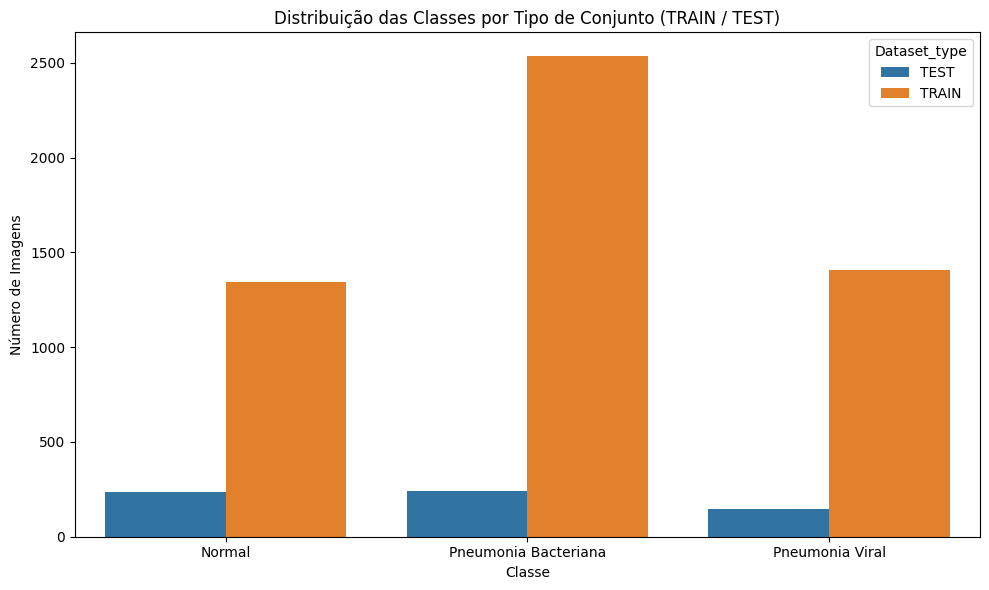


Contagem por Classe e Tipo de Conjunto:
Dataset_type          TEST  TRAIN
final_label                      
Normal                 234   1342
Pneumonia Bacteriana   242   2535
Pneumonia Viral        148   1407


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o CSV de metadados
BASE_FOLDER = '/content/coronahack_dataset'
ORIGINAL_METADATA_CSV = os.path.join(BASE_FOLDER, 'Chest_xray_Corona_Metadata.csv')

# Carrega o CSV
df = pd.read_csv(ORIGINAL_METADATA_CSV)

# Corrige erro de grafia
df['Label'] = df['Label'].replace('Pnemonia', 'Pneumonia')

# Define classes finais
df['final_label'] = 'Outros'
df.loc[df['Label'] == 'Normal', 'final_label'] = 'Normal'
df.loc[(df['Label'] == 'Pneumonia') & (df['Label_1_Virus_category'] == 'Virus'), 'final_label'] = 'Pneumonia Viral'
df.loc[(df['Label'] == 'Pneumonia') & (df['Label_1_Virus_category'] == 'bacteria'), 'final_label'] = 'Pneumonia Bacteriana'

# Remove classe "Outros"
df_classified = df[df['final_label'] != 'Outros']

# Conta imagens por classe e por tipo de dataset (TRAIN/TEST)
class_counts = df_classified.groupby(['Dataset_type', 'final_label']).size().reset_index(name='count')

# --- Visualização com Seaborn ---
plt.figure(figsize=(10, 6))
sns.barplot(data=class_counts, x='final_label', y='count', hue='Dataset_type')
plt.title('Distribuição das Classes por Tipo de Conjunto (TRAIN / TEST)')
plt.ylabel('Número de Imagens')
plt.xlabel('Classe')
plt.tight_layout()
plt.show()

# --- Imprime os números brutos também ---
print("\nContagem por Classe e Tipo de Conjunto:")
print(class_counts.pivot(index='final_label', columns='Dataset_type', values='count').fillna(0).astype(int))


# Codigo 2
# Limpeza do data set e organização das colunas
# Reorganização dos arquivos das imagens para obtermos um conjunto de dados balanceados corrigindo distorções
# trainamento 80% teste 10% validação 10%

In [3]:
import pandas as pd
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import logging

# --- Configuração Inicial ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- DEFINIÇÃO DOS CAMINHOS ---
BASE_FOLDER = '/content/coronahack_dataset'
ORIGINAL_METADATA_CSV = os.path.join(BASE_FOLDER, 'Chest_xray_Corona_Metadata.csv')

# Caminho corrigido para a pasta de imagens (ajuste se a estrutura for diferente no seu ambiente)
ORIGINAL_IMAGES_FOLDER = os.path.join(BASE_FOLDER, 'Coronahack-Chest-XRay-Dataset', 'Coronahack-Chest-XRay-Dataset')

PROCESSED_DATA_FOLDER = '/content/dados_processados'
TARGET_IMAGE_SIZE = (128, 128)
VALIDATION_SET_SIZE = 0.20 # Define o tamanho do conjunto de validação em relação ao TRAIN original
RANDOM_STATE = 42 # Para reprodutibilidade

# --- FUNÇÃO PARA PROCESSAR E ORGANIZAR AS IMAGENS ---
def process_and_organize_images(dataframe: pd.DataFrame, set_name: str):
    logging.info(f"Processando e organizando {len(dataframe)} imagens para o conjunto '{set_name}'...")

    # Limpar a pasta de destino para evitar mistura de execuções anteriores, se existir
    set_destination_folder = os.path.join(PROCESSED_DATA_FOLDER, set_name)
    if os.path.exists(set_destination_folder):
        logging.info(f"Removendo pasta existente: {set_destination_folder}")
        shutil.rmtree(set_destination_folder)
    os.makedirs(set_destination_folder, exist_ok=True) # Criar novamente

    for _, row in tqdm(dataframe.iterrows(), total=len(dataframe), desc=f"Processando conjunto {set_name}"):
        try:
            image_name = row['X_ray_image_name']
            image_label = row['final_label']
            dataset_type_folder = row['Dataset_type'].lower() # 'train' ou 'test'

            # Construir o caminho da imagem original
            source_path = os.path.join(ORIGINAL_IMAGES_FOLDER, dataset_type_folder, image_name)

            # Define pasta e nome de destino
            destination_folder_path = os.path.join(PROCESSED_DATA_FOLDER, set_name, image_label)
            os.makedirs(destination_folder_path, exist_ok=True) # Cria a subpasta da classe
            new_image_name = os.path.splitext(image_name)[0] + ".jpeg"
            destination_file_path = os.path.join(destination_folder_path, new_image_name)

            with Image.open(source_path) as img:
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                img_resized = img.resize(TARGET_IMAGE_SIZE, Image.LANCZOS)
                img_resized.save(destination_file_path, format='jpeg', quality=95)

        except FileNotFoundError:
            logging.warning(f"Arquivo não encontrado e ignorado: {source_path}")
        except Exception as e:
            logging.error(f"Erro ao processar o arquivo {source_path}: {e}")

# --- BLOCO DE EXECUÇÃO PRINCIPAL ---
if __name__ == '__main__':
    logging.info("--- INICIANDO FASE 1: PREPARAÇÃO E ORGANIZAÇÃO DOS DADOS ---")

    # 0. Limpar pasta de saída principal para uma execução limpa
    if os.path.exists(PROCESSED_DATA_FOLDER):
        logging.info(f"Removendo pasta de dados processados existente: {PROCESSED_DATA_FOLDER}")
        shutil.rmtree(PROCESSED_DATA_FOLDER)
    os.makedirs(PROCESSED_DATA_FOLDER, exist_ok=True) # Criar novamente

    if not os.path.exists(ORIGINAL_METADATA_CSV):
        logging.error(f"ERRO: Arquivo '{ORIGINAL_METADATA_CSV}' não encontrado. Execute o Código 1 (ou baixe o dataset) primeiro.")
    else:
        # 1. Ler o CSV.
        original_df = pd.read_csv(ORIGINAL_METADATA_CSV)

        # Verifica colunas obrigatórias
        required_cols = ['Label', 'Label_1_Virus_category', 'Dataset_type', 'X_ray_image_name']
        if not all(col in original_df.columns for col in required_cols):
            raise ValueError(f"CSV está faltando colunas esperadas: {required_cols}")

        # Corrige erros de grafia
        original_df['Label'] = original_df['Label'].replace('Pnemonia', 'Pneumonia')

        # 2. Filtrar as 3 classes-alvo e criar 'final_label'
        logging.info("Definindo 3 classes alvo e limpando metadados...")
        original_df['final_label'] = 'Outros'
        original_df.loc[original_df['Label'] == 'Normal', 'final_label'] = 'Normal'
        original_df.loc[(original_df['Label'] == 'Pneumonia') & (original_df['Label_1_Virus_category'] == 'Virus'), 'final_label'] = 'Pneumonia Viral'
        original_df.loc[(original_df['Label'] == 'Pneumonia') & (original_df['Label_1_Virus_category'] == 'bacteria'), 'final_label'] = 'Pneumonia Bacteriana'

        df_classified = original_df[original_df['final_label'] != 'Outros'].copy()

        # 3. Separar o conjunto TEST como está.
        logging.info("Separando conjunto de Teste...")
        df_test = df_classified[df_classified['Dataset_type'].str.upper() == 'TEST'].copy()
        logging.info(f"Tamanho do conjunto de Teste: {len(df_test)}")
        logging.info(f"Distribuição do Teste:\n{df_test['final_label'].value_counts()}")

        # Obter o conjunto TRAIN original completo
        df_train_original_full = df_classified[df_classified['Dataset_type'].str.upper() == 'TRAIN'].copy()
        logging.info(f"Tamanho do conjunto TRAIN original completo: {len(df_train_original_full)}")
        logging.info(f"Distribuição original do TRAIN:\n{df_train_original_full['final_label'].value_counts()}")

        # --- NOVA LÓGICA DE DIVISÃO E BALANCEAMENTO ---
        logging.info("Dividindo o conjunto TRAIN original em Treino e Validação (estratificado para Validação)...")

        # 4a. Separar o conjunto de Validação de forma ESTRATIFICADA do df_train_original_full
        # Isso garante que a validação tenha uma distribuição de classes similar à do TRAIN original.
        df_temp_train, df_validation = train_test_split(
            df_train_original_full,
            test_size=VALIDATION_SET_SIZE,
            random_state=RANDOM_STATE,
            stratify=df_train_original_full['final_label'] # Isso é chave para balancear a validação
        )
        logging.info(f"Tamanho do conjunto de Validação (estratificado): {len(df_validation)}")
        logging.info(f"Distribuição do Validação (estratificado):\n{df_validation['final_label'].value_counts()}")

        # 4b. Balancear o conjunto de Treino (df_temp_train) usando under-sampling
        logging.info("Balanceando o conjunto de Treino restante (via under-sampling)...")
        class_counts_temp_train = df_temp_train['final_label'].value_counts()
        min_class_count_temp_train = class_counts_temp_train.min()
        logging.info(f"Tamanho da classe minoritária no TRAIN temporário para balanceamento: {min_class_count_temp_train}")

        df_train_balanced_list = []
        for label in df_temp_train['final_label'].unique():
            class_df = df_temp_train[df_temp_train['final_label'] == label].copy()
            # Fazer under-sampling para o tamanho da menor classe
            df_train_balanced_list.append(class_df.sample(n=min_class_count_temp_train, random_state=RANDOM_STATE))

        df_train = pd.concat(df_train_balanced_list).sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

        logging.info(f"Tamanhos dos conjuntos finais: {len(df_train)} (Treino Balanceado), {len(df_validation)} (Validação Estratificada), {len(df_test)} (Teste).")
        logging.info(f"Distribuição final do Treino Balanceado:\n{df_train['final_label'].value_counts()}")
        logging.info(f"Distribuição final da Validação Estratificada:\n{df_validation['final_label'].value_counts()}")

        # 5. Redimensionar e organizar as pastas
        process_and_organize_images(df_train, 'train') # As imagens do treino balanceado
        process_and_organize_images(df_validation, 'validation') # As imagens da validação estratificada
        process_and_organize_images(df_test, 'test') # As imagens do teste original

        # Salva os metadados dos novos conjuntos
        df_train.to_csv(os.path.join(PROCESSED_DATA_FOLDER, 'train_metadata.csv'), index=False)
        df_validation.to_csv(os.path.join(PROCESSED_DATA_FOLDER, 'validation_metadata.csv'), index=False)
        df_test.to_csv(os.path.join(PROCESSED_DATA_FOLDER, 'test_metadata.csv'), index=False)

        logging.info("\n--- FASE 1 CONCLUÍDA COM SUCESSO ---")
        logging.info(f"Dados processados e salvos em: '{PROCESSED_DATA_FOLDER}'")

        print("\nVerificando a estrutura de pastas final (amostra):")
        os.system(f'ls -R {PROCESSED_DATA_FOLDER} | head -n 15')
        print(f"\nDetalhes de contagem das classes no conjunto 'train':\n{df_train['final_label'].value_counts()}")
        print(f"\nDetalhes de contagem das classes no conjunto 'validation':\n{df_validation['final_label'].value_counts()}")
        print(f"\nDetalhes de contagem das classes no conjunto 'test':\n{df_test['final_label'].value_counts()}")

Processando conjunto test: 100%|██████████| 624/624 [00:14<00:00, 44.40it/s]


Verificando a estrutura de pastas final (amostra):
/content/dados_processados:
test
test_metadata.csv
train
train_metadata.csv
validation
validation_metadata.csv

/content/dados_processados/test:
Normal
Pneumonia Bacteriana
Pneumonia Viral

/content/dados_processados/test/Normal:
IM-0001-0001.jpeg

Detalhes de contagem das classes no conjunto 'train':
final_label
Pneumonia Viral         1074
Pneumonia Bacteriana    1074
Normal                  1074
Name: count, dtype: int64

Detalhes de contagem das classes no conjunto 'validation':
final_label
Pneumonia Bacteriana    507
Pneumonia Viral         282
Normal                  268
Name: count, dtype: int64

Detalhes de contagem das classes no conjunto 'test':
final_label
Pneumonia Bacteriana    242
Normal                  234
Pneumonia Viral         148
Name: count, dtype: int64



ls: write error: Broken pipe


# GRAFICO DOS DATAFRAME BALACEADOS

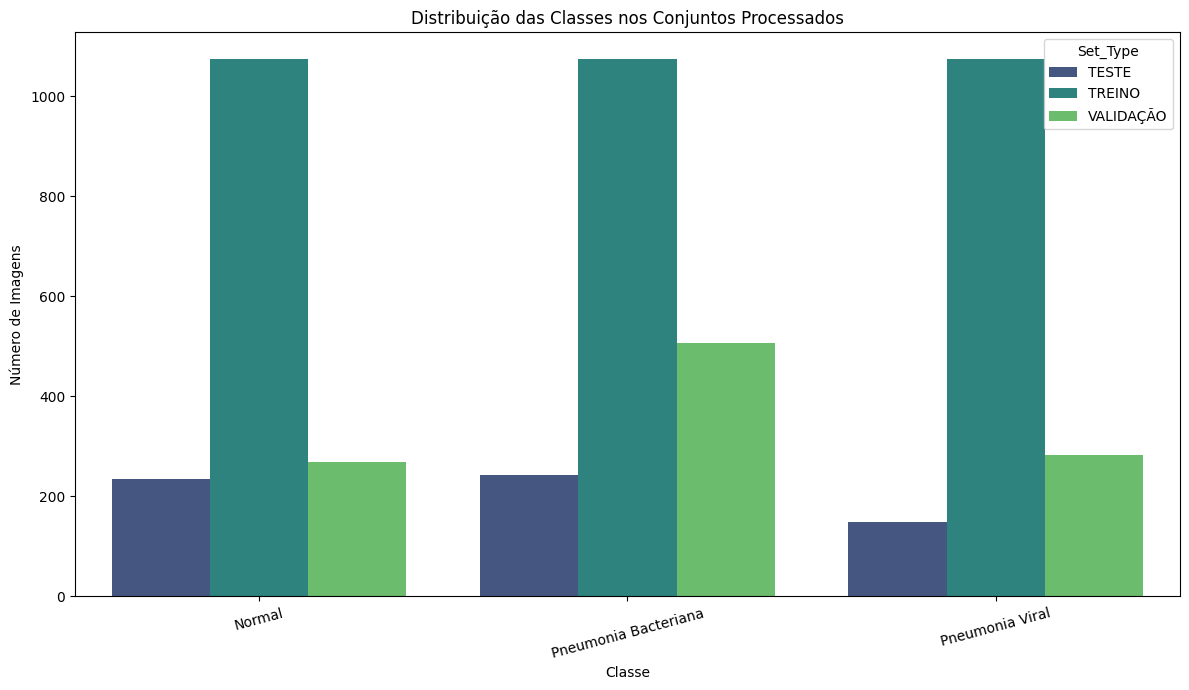


Contagem por Classe e Tipo de Conjunto (Dados Processados):
Set_Type              TESTE  TREINO  VALIDAÇÃO
final_label                                   
Normal                  234    1074        268
Pneumonia Bacteriana    242    1074        507
Pneumonia Viral         148    1074        282


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- DEFINIÇÃO DOS CAMINHOS PARA OS DADOS PROCESSADOS ---
PROCESSED_DATA_FOLDER = '/content/dados_processados'
TRAIN_METADATA_CSV = os.path.join(PROCESSED_DATA_FOLDER, 'train_metadata.csv')
VALIDATION_METADATA_CSV = os.path.join(PROCESSED_DATA_FOLDER, 'validation_metadata.csv')
TEST_METADATA_CSV = os.path.join(PROCESSED_DATA_FOLDER, 'test_metadata.csv')

# Verifica se os arquivos de metadados processados existem
if not all(os.path.exists(f) for f in [TRAIN_METADATA_CSV, VALIDATION_METADATA_CSV, TEST_METADATA_CSV]):
    print("Erro: Os arquivos de metadados processados não foram encontrados.")
    print("Por favor, execute o código que gera os conjuntos de Treino, Validação e Teste (com o balanceamento) primeiro.")
    print(f"Esperava encontrar os arquivos em: {PROCESSED_DATA_FOLDER}")
else:
    # Carrega os CSVs processados
    df_train = pd.read_csv(TRAIN_METADATA_CSV)
    df_validation = pd.read_csv(VALIDATION_METADATA_CSV)
    df_test = pd.read_csv(TEST_METADATA_CSV)

    # Adiciona uma coluna 'Set_Type' para identificar cada conjunto
    df_train['Set_Type'] = 'TREINO'
    df_validation['Set_Type'] = 'VALIDAÇÃO'
    df_test['Set_Type'] = 'TESTE'

    # Concatena todos os DataFrames em um único para visualização
    df_combined = pd.concat([df_train, df_validation, df_test])

    # Conta imagens por classe e por tipo de conjunto (TREINO/VALIDAÇÃO/TESTE)
    class_counts = df_combined.groupby(['Set_Type', 'final_label']).size().reset_index(name='count')

    # --- Visualização com Seaborn ---
    plt.figure(figsize=(12, 7)) # Aumenta o tamanho para melhor visualização com 3 conjuntos
    sns.barplot(data=class_counts, x='final_label', y='count', hue='Set_Type', palette='viridis')
    plt.title('Distribuição das Classes nos Conjuntos Processados')
    plt.ylabel('Número de Imagens')
    plt.xlabel('Classe')
    plt.xticks(rotation=15) # Rotaciona os rótulos do eixo X para melhor leitura
    plt.tight_layout()
    plt.show()

    # --- Imprime os números brutos também ---
    print("\nContagem por Classe e Tipo de Conjunto (Dados Processados):")
    print(class_counts.pivot(index='final_label', columns='Set_Type', values='count').fillna(0).astype(int))

# INICIO DA FASE 2
# Construção e Treinamento do Modelo de Deep Learning
# CODIGO 3
# Usar o TensorFlow/Keras para a normalização de pixel

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuração do Data Augmentation para o conjunto de TREINO
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalização para [0,1] - essencial!
    rotation_range=15, # Exemplo: rotação aleatória de até 15 graus
    zoom_range=0.1,    # Exemplo: zoom aleatório de até 10%
    width_shift_range=0.1, # Exemplo: deslocamento horizontal de até 10%
    height_shift_range=0.1, # Exemplo: deslocamento vertical de até 10%
    horizontal_flip=True,  # Exemplo: espelhamento horizontal
    # vertical_flip=True, # Depende do tipo de imagem (para raios-X, geralmente não faz sentido)
    fill_mode='nearest'    # Preenche pixels novos após transformações
)

# Configuração para VALIDAÇÃO e TESTE (apenas normalização, sem aumento de dados)
# Não se aplica Data Augmentation nos conjuntos de validação e teste para que
# a avaliação seja feita em dados realistas e sem distorções artificiais.
validation_test_datagen = ImageDataGenerator(rescale=1./255)

# Em seguida, você criaria os geradores de dados para cada conjunto:
train_generator = train_datagen.flow_from_directory(
    '/content/dados_processados/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical' # Supondo 3 classes de saída ('Normal', 'Pneumonia Viral', 'Pneumonia Bacteriana')
)

validation_generator = validation_test_datagen.flow_from_directory(
    '/content/dados_processados/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_test_datagen.flow_from_directory(
    '/content/dados_processados/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Importante para garantir a ordem para avaliação final
)

2025-06-14 17:31:40.294440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749922300.494437      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749922300.547388      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3222 images belonging to 3 classes.
Found 1057 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


# CODIGO 4
# Construção e Treinamento do Modelo de Deep Learning

Número de classes detectado: 3
Configurando Data Generators...
Found 3222 images belonging to 3 classes.
Found 1057 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Class weights calculados: {0: 1.0, 1: 1.0, 2: 1.0}

Construindo o modelo com Transfer Learning...

Compilando o modelo inicial (cabeça)...


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,049,027 (11.63 MB)

 Trainable params: 789,507 (3.01 MB)

 Non-trainable params: 2,259,520 (8.62 MB)


Treinando só a cabeça do modelo...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5795 - loss: 1.2328 - precision_6: 0.5882 - recall_6: 0.5615
Epoch 1: val_accuracy improved from -inf to 0.58902, saving model to /content/dados_processados/best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.5800 - loss: 1.2310 - precision_6: 0.5887 - recall_6: 0.5619 - val_accuracy: 0.5890 - val_loss: 1.1891 - val_precision_6: 0.6099 - val_recall_6: 0.5597 - learning_rate: 0.0010
Epoch 2/50
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6250 - loss: 1.0615 - precision_6: 0.6129 - recall_6: 0.5938

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.58902
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 1.0615 - precision_6: 0.6129 - recall_6: 0.5938 - val_accuracy: 0.5862 - val_loss: 1.2003 - val_precision_6: 0.6054 - val_recall_6: 0.5521 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6606 - loss: 0.8415 - precision_6: 0.6735 - recall_6: 0.6398
Epoch 3: val_accuracy improved from 0.58902 to 0.59186, saving model to /content/dados_processados/best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.6606 - loss: 0.8412 - precision_6: 0.6735 - recall_6: 0.6398 - val_accuracy: 0.5919 - val_loss: 1.4301 - val_precision_6: 0.6014 - val_recall_6: 0.5587 - learning_rate: 0.0010
Epoch 4/50
  1/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6875 - loss: 0.7845 - precision_6: 0.6897 - recall_6: 0.6250
Epoch 4: val_accuracy did not improve from 0.59186
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875

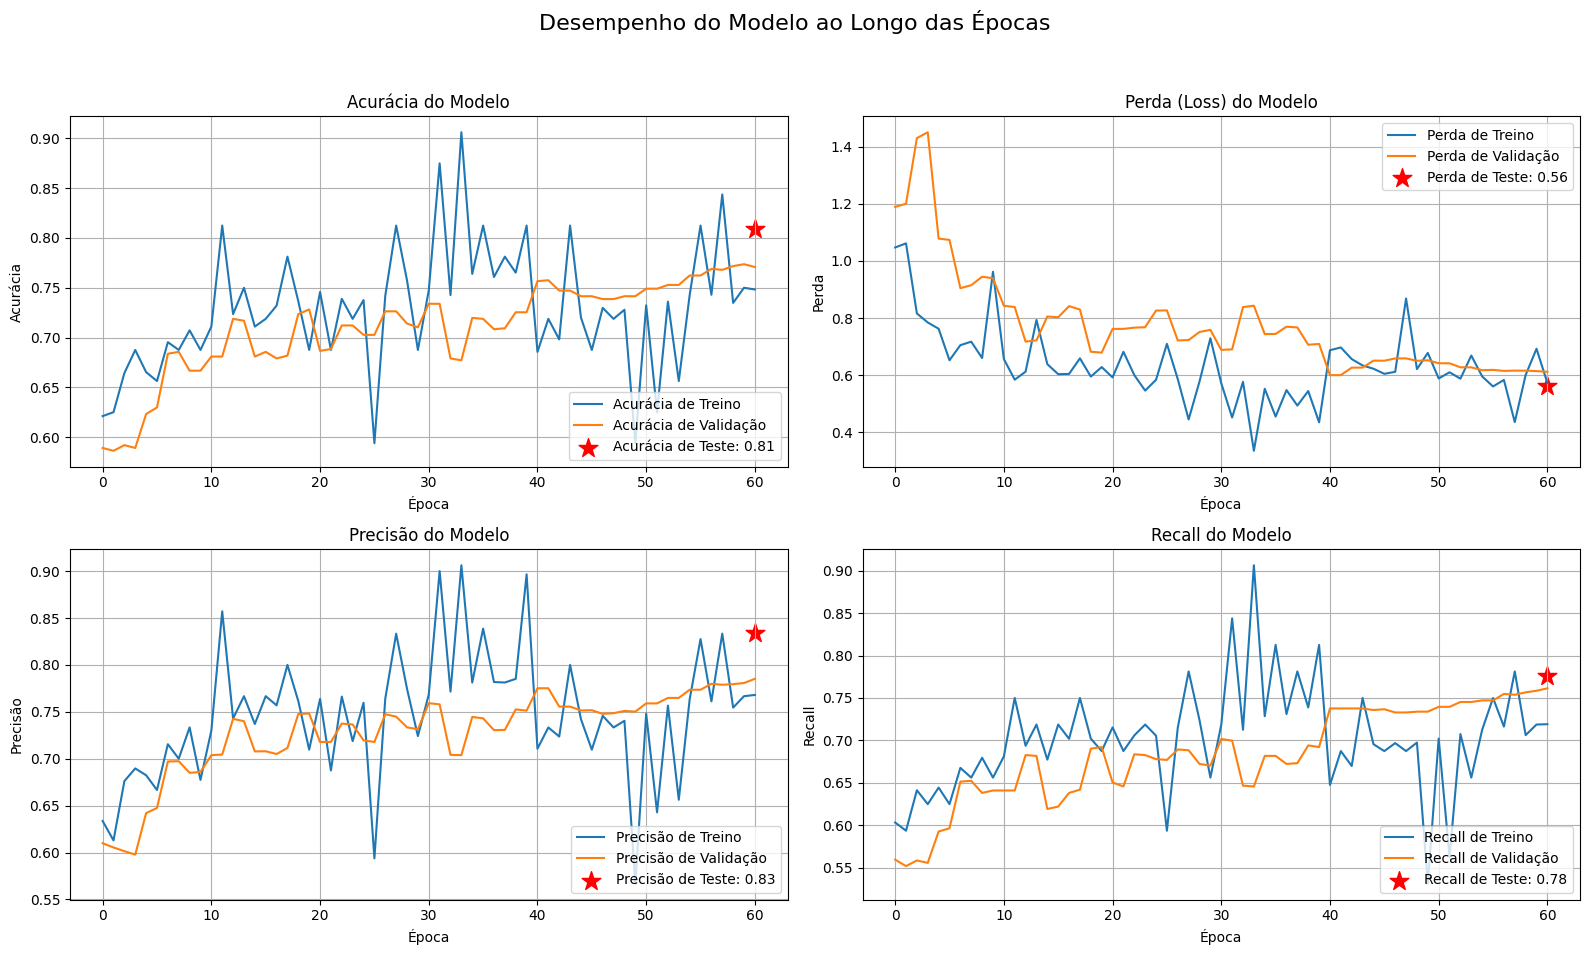


--- Treinamento e Avaliação Concluídos ---


In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# ==============================================================================
# --- 1. CONFIGURAÇÃO DE HIPERPARÂMETROS ---
# Altere os valores nesta seção para experimentar diferentes configurações.
# ==============================================================================

# -- Parâmetros de Dados e Treinamento --
HP_TARGET_IMAGE_SIZE = (128, 128)  # Dimensões para redimensionar as imagens
HP_BATCH_SIZE = 32                 # Número de imagens por lote
HP_NUM_EPOCHS = 50                 # Máximo de épocas para o treinamento inicial
HP_NUM_FINE_TUNE_EPOCHS = 30       # Máximo de épocas para o ajuste fino

# -- Parâmetros de Data Augmentation --
HP_ROTATION_RANGE = 30             # Rotação aleatória em graus
HP_ZOOM_RANGE = 0.2                # Zoom aleatório
HP_WIDTH_SHIFT_RANGE = 0.2         # Deslocamento horizontal aleatório
HP_HEIGHT_SHIFT_RANGE = 0.2        # Deslocamento vertical aleatório
HP_SHEAR_RANGE = 0.2               # Intensidade de cisalhamento
HP_HORIZONTAL_FLIP = True          # Inverter imagens horizontalmente

# -- Parâmetros da Arquitetura do Modelo --
HP_DENSE_UNITS_1 = 512             # Neurônios na primeira camada densa
HP_DROPOUT_RATE_1 = 0.6            # Taxa de dropout após a primeira camada densa
HP_DENSE_UNITS_2 = 256             # Neurônios na segunda camada densa
HP_DROPOUT_RATE_2 = 0.4            # Taxa de dropout após a segunda camada densa

# -- Parâmetros de Otimização e Compilação --
HP_LEARNING_RATE_INITIAL = 0.001   # Taxa de aprendizado para o treino inicial
HP_LEARNING_RATE_FINE_TUNE = HP_LEARNING_RATE_INITIAL/100  # Taxa de aprendizado para o ajuste fino

# -- Parâmetros de Fine-Tuning e Callbacks --
HP_UNFREEZE_LAYERS = 30            # Número de camadas a descongelar no modelo base
HP_EARLY_STOPPING_PATIENCE = 20    # Paciência para parada antecipada
HP_LR_PLATEAU_PATIENCE = 7         # Paciência para redução da taxa de aprendizado
HP_LR_PLATEAU_FACTOR = 0.5         # Fator de redução da taxa de aprendizado

# -- Constante de Aleatoriedade --
RANDOM_STATE = 42

# ==============================================================================
# --- 2. DEFINIÇÃO DE CAMINHOS E CONSTANTES ---
# ==============================================================================
PROCESSED_DATA_FOLDER = '/content/dados_processados'
TRAIN_DIR = os.path.join(PROCESSED_DATA_FOLDER, 'train')
VALIDATION_DIR = os.path.join(PROCESSED_DATA_FOLDER, 'validation')
TEST_DIR = os.path.join(PROCESSED_DATA_FOLDER, 'test')

try:
    df_train_meta = pd.read_csv(os.path.join(PROCESSED_DATA_FOLDER, 'train_metadata.csv'))
    NUM_CLASSES = len(df_train_meta['final_label'].unique())
    print(f"Número de classes detectado: {NUM_CLASSES}")
except FileNotFoundError:
    print("train_metadata.csv não encontrado. Usando 3 classes como padrão.")
    NUM_CLASSES = 3

# ==============================================================================
# --- 3. DATA GENERATORS E AUGMENTATION ---
# ==============================================================================
print("Configurando Data Generators...")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=HP_ROTATION_RANGE,
    zoom_range=HP_ZOOM_RANGE,
    width_shift_range=HP_WIDTH_SHIFT_RANGE,
    height_shift_range=HP_HEIGHT_SHIFT_RANGE,
    shear_range=HP_SHEAR_RANGE,
    horizontal_flip=HP_HORIZONTAL_FLIP,
    fill_mode='nearest'
)

validation_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=HP_TARGET_IMAGE_SIZE,
    batch_size=HP_BATCH_SIZE,
    class_mode='categorical',
    seed=RANDOM_STATE
)

validation_generator = validation_test_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=HP_TARGET_IMAGE_SIZE,
    batch_size=HP_BATCH_SIZE,
    class_mode='categorical',
    seed=RANDOM_STATE
)

test_generator = validation_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=HP_TARGET_IMAGE_SIZE,
    batch_size=HP_BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=RANDOM_STATE
)

# ==============================================================================
# --- 4. CÁLCULO DE PESOS DE CLASSE ---
# ==============================================================================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights calculados:", class_weights_dict)

# ==============================================================================
# --- 5. CONSTRUÇÃO DO MODELO ---
# ==============================================================================
print("\nConstruindo o modelo com Transfer Learning...")

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(HP_TARGET_IMAGE_SIZE[0], HP_TARGET_IMAGE_SIZE[1], 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(HP_DENSE_UNITS_1, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(HP_DROPOUT_RATE_1)(x)
x = Dense(HP_DENSE_UNITS_2, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(HP_DROPOUT_RATE_2)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ==============================================================================
# --- 6. COMPILAÇÃO INICIAL DO MODELO ---
# ==============================================================================
print("\nCompilando o modelo inicial (cabeça)...")
model.compile(
    optimizer=Adam(learning_rate=HP_LEARNING_RATE_INITIAL),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()

# ==============================================================================
# --- 7. CONFIGURAÇÃO DOS CALLBACKS ---
# ==============================================================================
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=HP_EARLY_STOPPING_PATIENCE,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(PROCESSED_DATA_FOLDER, 'best_model.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=HP_LR_PLATEAU_FACTOR,
    patience=HP_LR_PLATEAU_PATIENCE,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [early_stopping, model_checkpoint, lr_scheduler]

# ==============================================================================
# --- 8. TREINAMENTO INICIAL (TRANSFER LEARNING) ---
# ==============================================================================
print("\nTreinando só a cabeça do modelo...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // HP_BATCH_SIZE,
    epochs=HP_NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // HP_BATCH_SIZE,
    callbacks=callbacks_list,
    class_weight=class_weights_dict
)

# ==============================================================================
# --- 9. AJUSTE FINO (FINE-TUNING) ---
# ==============================================================================
print("\nDescongelando parte do modelo base para Fine-Tuning...")

for layer in base_model.layers[-HP_UNFREEZE_LAYERS:]:
    layer.trainable = True

print("\nRecompilando modelo para Fine-Tuning...")
model.compile(
    optimizer=Adam(learning_rate=HP_LEARNING_RATE_FINE_TUNE),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("\nTreinando com Fine-Tuning...")
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // HP_BATCH_SIZE,
    epochs=HP_NUM_FINE_TUNE_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // HP_BATCH_SIZE,
    callbacks=callbacks_list,
    class_weight=class_weights_dict
)

# ==============================================================================
# --- 10. AVALIAÇÃO FINAL ---
# ==============================================================================
print("\n-------------------------------------------------")
print("Avaliação final no conjunto de teste:")
test_results = model.evaluate(test_generator, steps=test_generator.samples // HP_BATCH_SIZE, verbose=1)

print(f"\nResultados no Teste:")
print(f"  Loss: {test_results[0]:.4f}")
print(f"  Accuracy: {test_results[1]:.4f}")
print(f"  Precision: {test_results[2]:.4f}")
print(f"  Recall: {test_results[3]:.4f}")

# ==============================================================================
# --- 11. PLOTAGEM DOS RESULTADOS ---
# ==============================================================================
print("\nGerando gráficos de desempenho...")

def find_metric_keys(history_dict):
    keys = {'precision': None, 'val_precision': None, 'recall': None, 'val_recall': None}
    for key in history_dict.keys():
        if 'val_recall' in key: keys['val_recall'] = key
        elif 'recall' in key: keys['recall'] = key
        elif 'val_precision' in key: keys['val_precision'] = key
        elif 'precision' in key: keys['precision'] = key
    return keys

initial_keys = find_metric_keys(history.history)
fine_tune_keys = find_metric_keys(history_fine.history)

acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']
precision = history.history[initial_keys['precision']] + history_fine.history[fine_tune_keys['precision']]
val_precision = history.history[initial_keys['val_precision']] + history_fine.history[fine_tune_keys['val_precision']]
recall = history.history[initial_keys['recall']] + history_fine.history[fine_tune_keys['recall']]
val_recall = history.history[initial_keys['val_recall']] + history_fine.history[fine_tune_keys['val_recall']]

total_epochs = len(acc)
epochs_range = range(total_epochs)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.scatter(total_epochs - 1, test_results[1], color='red', marker='*', s=200, label=f'Acurácia de Teste: {test_results[1]:.2f}')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.scatter(total_epochs - 1, test_results[0], color='red', marker='*', s=200, label=f'Perda de Teste: {test_results[0]:.2f}')
plt.title('Perda (Loss) do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(epochs_range, precision, label='Precisão de Treino')
plt.plot(epochs_range, val_precision, label='Precisão de Validação')
plt.scatter(total_epochs - 1, test_results[2], color='red', marker='*', s=200, label=f'Precisão de Teste: {test_results[2]:.2f}')
plt.title('Precisão do Modelo')
plt.xlabel('Época')
plt.ylabel('Precisão')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs_range, recall, label='Recall de Treino')
plt.plot(epochs_range, val_recall, label='Recall de Validação')
plt.scatter(total_epochs - 1, test_results[3], color='red', marker='*', s=200, label=f'Recall de Teste: {test_results[3]:.2f}')
plt.title('Recall do Modelo')
plt.xlabel('Época')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.grid(True)

plt.suptitle('Desempenho do Modelo ao Longo das Épocas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Treinamento e Avaliação Concluídos ---")

# apresenta os hiperparametros utilizados